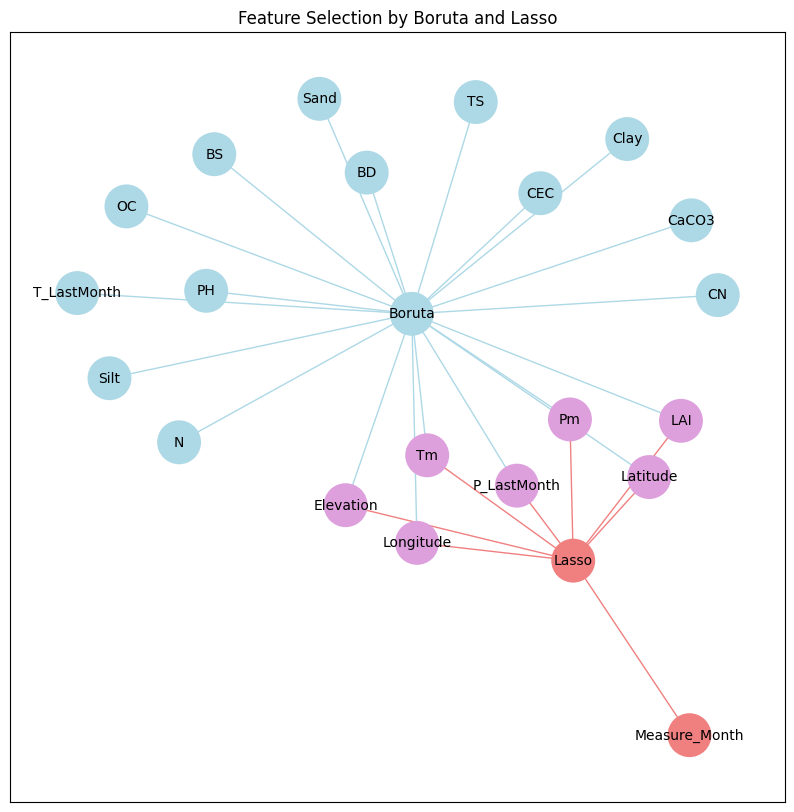

In [12]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import networkx as nx
# 定义Boruta和Lasso选择的特征
boruta_features = [    
    'TS', 'Pm', 'Tm', 'P_LastMonth', 'T_LastMonth', 'LAI', 'BD', 'BS', 'CN', 'CaCO3', 'CEC', 'Clay', 'Sand', 'Silt', 'N', 'OC', 'PH', 'Elevation', 'Longitude', 'Latitude']

lasso_features = [    
    'Pm', 'Tm', 'P_LastMonth', 'LAI', 'Elevation', 'Latitude', 'Longitude','Measure_Month']

boruta_set = set(boruta_features)
lasso_set = set(lasso_features)
intersection = boruta_set.intersection(lasso_set)
boruta_only = boruta_set - intersection
lasso_only = lasso_set - intersection
# 创建图
G = nx.Graph()

# 添加节点和边
for feature in boruta_only:
    G.add_edge('Boruta', feature, color='lightblue')  # 淡红色表示仅被Boruta选择的特征
for feature in lasso_only:
    G.add_edge('Lasso', feature, color='lightcoral')  # 淡蓝色表示仅被Lasso选择的特征
for feature in intersection:
    G.add_edge('Boruta', feature, color='lightblue')  # 淡红色边连接交集特征到Boruta
    G.add_edge('Lasso', feature, color='lightcoral')  # 淡蓝色边连接交集特征到Lasso
    
edge_colors = [data['color'] for _, _, data in G.edges(data=True)]
node_colors = []
for node in G.nodes():
    if node == 'Boruta':
        node_colors.append('lightblue')  # Boruta节点淡红色
    elif node == 'Lasso':
        node_colors.append('lightcoral')   # Lasso节点淡蓝色
    elif node in boruta_only:
        node_colors.append('lightblue')  # 仅被Boruta选择的特征淡红色
    elif node in lasso_only:
        node_colors.append('lightcoral')   # 仅被Lasso选择的特征淡蓝色
    elif node in intersection:
        node_colors.append('plum')        # 交集特征节点用淡紫色表示

# 绘制图形
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G, seed=42)  # 使用spring布局
nx.draw_networkx(
    G,
    pos,
    edge_color=edge_colors,
    node_color=node_colors,
    with_labels=True,
    node_size=1000,
    font_size=10,
    edgecolors='none'  # 移除节点边框
)
plt.title('Feature Selection by Boruta and Lasso')
plt.savefig('network_graph.png', format='png')
plt.show()


In [2]:
pip install networkx

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 12.0 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.
